<a href="https://colab.research.google.com/github/Deare-stack/GenAI/blob/main/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Importing Libraries

# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for calculating distances
from scipy.spatial import distance
##KDTree from scipy.spatial is used for efficiently finding the nearest land points to grid points
from scipy.spatial import KDTree
import numpy as np

In [2]:
#@title Defining Known Land Mass Points

# A dictionary where each key is a continent and the value is a list of tuples
# representing points on that continent.

land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],##tuple
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

In [3]:
#@title Defining a Grid of Points

# Create a grid of points with latitude ranging from -90 to 90 and longitude
# from -180 to 180 in steps of 10.

grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]

In [4]:
#@title Calculating Prior Probabilities

# This function calculates the prior probabilities of a point being land or sea based on
# the number of land points versus the total points.

def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points ##likelihood of land
    P_sea = 1 - P_land##likelihood of sea

    return P_land, P_sea

In [5]:
#@title Calculating Likelihoods

# This function calculates the likelihoods of points being land or sea based on their distances
# to the nearest land point.

# The likelihood decreases exponentially with increasing distance from land.

def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}##likelihoods_land to store the likelihood of land for each grid point
    all_land_points = [point for points in land_points.values() for point in points]##This list combines all the coordinates from the land_points dictionary.
    tree = KDTree(all_land_points)##A KDTree uses all land points and allows quick search to finding the closest land poit in grid.
    ##Iterate through each piont in grid
    for point in grid_points:
        _, nearest_distance = tree.query(point)##tree.query(point) this method finds the closest land point in the KDTree
        likelihoods_land[point] = np.exp(-0.1 * nearest_distance)  #
        #Using an exponential decay because points are more likely to be classified as land the closer they are to other points on land.
                                                                  ##The likelihood of a point being classified as land decreases quickly with distance.
    return likelihoods_land

In [6]:

#@title Classifying Points

# This function classifies a point as land if it lies within the defined bounds of
# the "land model" box, otherwise classifies it as sea.


def classify_point(point, likelihoods_land, threshold=0.3):  ## I tried to use 0.5 as the threshold but the model not accurate so I adjusted the threshold to 0.3 which means that points with a likelihood of being land greater than 0.3 will be classified as "Land"
    # Ensure this line is indented to indicate it's part of the function body
    likelihood = likelihoods_land.get(point, 0)  # Default likelihood to 0 if not found
    return 'Land' if likelihood > threshold else 'Sea'##If the likelihood is greater than 0.3, it returns 'Land'; otherwise, it returns 'Sea'.

In [7]:
#@title Plotting the Points and Model

# This functions plots the land points, test points, and the bounding box of
# the land model on a 2D plot.

# Function to plot the points and the model
def plot_points(land_points, test_points, test_classifications):
    fig, ax = plt.subplots()##This line using Matplotlib's pyplot module used to polt data

    # Define colors for each continent
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot land points by continent
    ##Iterates through each continent stored in land_points
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)## separate x (latitude) and y (longitude)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent} Land Points')####using ax.scatter()plotted on a scatter plot, using continent_colors confirm the color for each set of points

    # Plot test points
    ##iterates through test_points and test_classifications and set Colors for test point if it is land then set green color,sea for bule and with an edge color of 'black'
    for point, classification in zip(test_points, test_classifications):
        color = 'green' if classification == 'Land' else 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='black', label=f'Test Point ({classification})')
    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')##The legend is in the top left of the plot
    plt.xlabel('Latitude')##Set the labels for the x-axis as 'Latitude'
    plt.ylabel('Longitude')## and y-axis as 'Longitude'
    plt.title('Land and Sea Points with Model')##add title
    plt.grid(True)##Enables a grid
    plt.show()##renders the plot in a window


Test Point Classifications:
Point (-20, -40): Land
Point (20, 75): Sea
Point (50, 50): Sea
Point (-30, 160): Sea
Point (80, -170): Land
Point (-55, 150): Sea


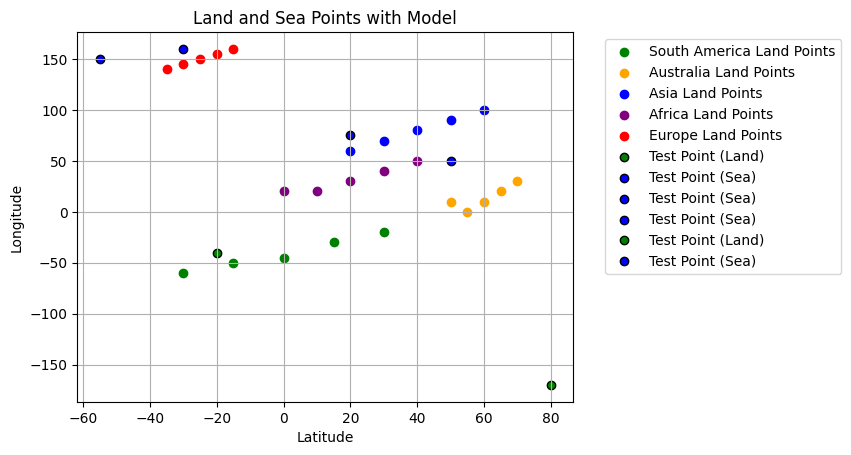

In [8]:
#@title Main Execution

# This section calculates the total grid points, prior probabilities, likelihoods,
# defines the model box, classifies test points, prints the classifications, and
# plots the points and the model.

# Total points in the grid
##calculates the total number of grid points

total_points = len(grid_points)

# Calculate prior probabilities
##calculates the probability of any given point being land (P_land) or sea (P_sea) based on the ratio of known land points to total points
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)
##using a KDTree calculate the likelihood of every point in grid being in land
likelihoods_land = calculate_likelihoods(grid_points, land_points)
## all land points into a single list
all_land_points = [point for points in land_points.values() for point in points]
# Define unknown test cases with more land points and fewer sea points
test_points = [
    # Land points inside the model
    (-20, -40), (20, 75), (50, 50), (-30, 160), (80, -170), (-55, 150)
]

# Classify test points
##classify_point classifies each point as "Land" or "Sea" based on whether the calculated likelihood exceeds the threshold of 0.3
test_classifications = [classify_point(point, likelihoods_land, threshold=0.3) for point in test_points]  # Adjusted threshold




# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")
# Plot the points and the model using updated plot function
plot_points(land_points, test_points, test_classifications)
